# Esperanzas de infectados en un tiempo T
## Procesos Estocásticos Grupo 5AM1
- Pineda Hernández Francisco 
- Ramirez Aguilar Rodrigo Vidal

In [1]:
# IMPORTAR LIBRERIAS NECESARIAS
import numpy as np  
import matplotlib.pyplot as plt 
import math

In [2]:
# FUNCIÓN PARA ENCONTRAR LA CANTIDAD DE INFECTADOS DADO UN TIEMPO T
def infected(y,I,s):
    z=0.004
    return (math.factorial(int(s)))/((math.factorial(int(s-y))*math.factorial(int(y))))*(1-(1-z)**I)**int(y)*((1-z)**I)**(s-int(y))

In [3]:

def calculoInfectados():
    infectados = []
    s0=400; inf0=3 
    inf=0; r=0; t=0
    while inf+inf0 != 0:
        x=np.linspace(0,s0-r,s0-r+1)
        y=[]
        for i in range(len(x)):
            y.append(infected(x[i],inf0+inf,s0-r))
        inf=int(np.random.choice(x,size=1,p=y)[0])
        r=r+inf
        inf0=0
        t+=1
        infectados.append(tuple([t, inf]))
    return infectados

In [ ]:
# GENERAR LOS CICLOS ALEATORIOS dado el numero de iteraciones indicado
iteraciones = []
for i in range(700): # 700 iteraciones
    iteracion = calculoInfectados()
    iteraciones.append(iteracion)

In [5]:
maxima = 0
for iteracion in iteraciones:
    if len(iteracion) > maxima:
        maxima = len(iteracion)
print("Valor de T máximo encontrado: ", maxima)

Valor de T máximo encontrado:  38


In [6]:
# AGREGAR CEROS A LA DERECHA A LAS ITERACIONES MENORES AL VALOR MÁXIMO ENCONTRADO
for iteracion in iteraciones:
    if len(iteracion) < maxima:
        for i in range(len(iteracion) + 1, maxima + 1):
            iteracion.append(tuple([i, 0]))
print("Ceros agregados correctamente a los valores menores a ", maxima)

Ceros agregados correctamente a los valores menores a  38


In [7]:
# CALCULAR LAS ESPERANZAS PARA CADA VALOR DE TIEMPO T 
# Y GENERAR UNA LISTA DE TIEMPOS DISCRETOS PARA EL EJE X
esperanzas = []
suma = 0
for maxim in range(maxima):
    suma = 0
    for iteracion in iteraciones:
        #print(iteracion[minim])
        suma += iteracion[maxim][1]
    esperanzas.append(suma/len(iteraciones))

# LISTA DE TIEMPOS DISCRETOS
t = [i for i in range(maxima)]
print(esperanzas)
print(t)

[4.698571428571428, 7.5042857142857144, 11.235714285714286, 16.271428571428572, 21.68, 26.24142857142857, 28.59285714285714, 28.161428571428573, 25.162857142857142, 20.68285714285714, 15.79, 11.857142857142858, 8.461428571428572, 5.911428571428571, 4.171428571428572, 2.9285714285714284, 1.9985714285714287, 1.3057142857142856, 0.8614285714285714, 0.5842857142857143, 0.43714285714285717, 0.30857142857142855, 0.20714285714285716, 0.14857142857142858, 0.10714285714285714, 0.07571428571428572, 0.05142857142857143, 0.03, 0.02142857142857143, 0.018571428571428572, 0.011428571428571429, 0.014285714285714285, 0.011428571428571429, 0.008571428571428572, 0.004285714285714286, 0.0014285714285714286, 0.0014285714285714286, 0.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


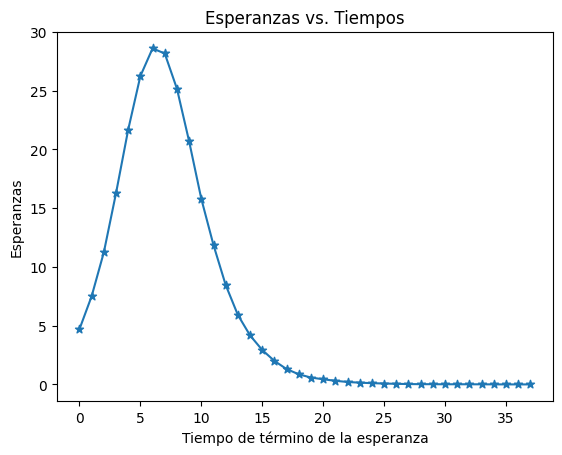

In [8]:
# GRÁFICA
fig=plt.figure()
ax=fig.gca()
x=t
y=esperanzas
plt.title("Esperanzas vs. Tiempos")
ax.set_xlabel("Tiempo de término de la esperanza")
ax.set_ylabel("Esperanzas")
ax.scatter(x,y, marker="*")
ax.plot(x,y)
plt.show()

---